In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
database=r"C:\Users\USER\tech\mental_health.sqlite"
conn=sqlite3.connect(database)
answer = pd.read_sql("select * from answer", con=conn)
question=pd.read_sql("select * from question", con=conn)
question.rename(columns={'questionid':'QuestionID'},inplace=True)
conn.close()

In [2]:
merged=pd.merge(answer,question,how='left',on='QuestionID')

In [3]:
questions=(list(merged['questiontext'].unique()))
len(questions)

105

In [4]:
merged

,AnswerText,SurveyID,UserID,QuestionID,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?
...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your wor...
236894,Support,2016,2690,117,Which of the following best describes your wor...
236895,Back-end Developer,2016,2691,117,Which of the following best describes your wor...
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your wor...


In [5]:
asked_question=question


In [6]:
asked_question


,questiontext,QuestionID
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [7]:
idi=list(merged["UserID"].unique())
len(idi)

4218

In [8]:
for i in range(1,1255):
    userid_wise=merged[merged["UserID"]==i]
    users_answer_text=userid_wise[['AnswerText','QuestionID']]
    asked_question=pd.merge(asked_question,users_answer_text,how='left',on='QuestionID')

In [9]:
asked_question=asked_question.T


In [10]:
asked_question.columns=asked_question.iloc[0]


In [11]:
asked_question

questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,...,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Which of the following best describes your work position?,Do you work remotely?
questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state ...",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental he...,How many employees does your company or organi...,Is your employer primarily a tech company/orga...,Does your employer provide mental health benef...,...,Do you think that discussing a physical health...,Would you have been willing to discuss a menta...,Did you feel that your previous employers took...,Did you hear of or observe negative consequenc...,Do you feel that being identified as a person ...,Do you think that team members/co-workers woul...,"If yes, what condition(s) have you been diagno...","If maybe, what condition(s) do you believe you...",Which of the following best describes your wor...,Do you work remotely?
QuestionID,1,2,3,4,5,6,7,8,9,10,...,109,110,111,112,113,114,115,116,117,118
AnswerText_x,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_y,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AnswerText_y,30,Male,United States,California,0,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,30,Male,United States,California,1,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_y,36,Male,South Africa,-1,0,Yes,1,100-500,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,29,Male,United States,North Carolina,0,Yes,1,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
asked_question.drop(['questiontext','QuestionID'],inplace=True)

In [13]:
asked_question

questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,...,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Which of the following best describes your work position?,Do you work remotely?
AnswerText_x,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_y,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_y,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AnswerText_y,30,Male,United States,California,0,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,30,Male,United States,California,1,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_y,36,Male,South Africa,-1,0,Yes,1,100-500,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnswerText_x,29,Male,United States,North Carolina,0,Yes,1,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
asked_question.reset_index(inplace=True)

In [15]:
asked_question.drop('index',axis=1,inplace=True)

In [16]:
asked_question

questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,...,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Which of the following best describes your work position?,Do you work remotely?
0,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,30,Male,United States,California,0,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,30,Male,United States,California,1,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,36,Male,South Africa,-1,0,Yes,1,100-500,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,29,Male,United States,North Carolina,0,Yes,1,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
asked_question

questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,...,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Which of the following best describes your work position?,Do you work remotely?
0,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,30,Male,United States,California,0,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,30,Male,United States,California,1,Yes,1,26-100,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,36,Male,South Africa,-1,0,Yes,1,100-500,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,29,Male,United States,North Carolina,0,Yes,1,100-500,1,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in asked_question.columns:
    print(i)

What is your age?
What is your gender?
What country do you live in?
If you live in the United States, which state or territory do you live in?
Are you self-employed?
Do you have a family history of mental illness?
Have you ever sought treatment for a mental health disorder from a mental health professional?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Does your employer provide mental health benefits as part of healthcare coverage?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
Would you bring up a mental health issue with a potential employer in an interview?
Is your primary role within your company related to tech/IT?
Do you know the options for mental health care available under your employer-provided health coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or

In [19]:
asked_question.iloc[:,33].isnull().sum()

1254

In [20]:
asked_question.columns[32]

'Do you currently have a mental health disorder?'

In [21]:
col=[]
for i in range(1,104):
    if asked_question.iloc[:,i].isnull().sum(axis=0)==1254:
        col.append(asked_question.columns[i])
        

In [22]:
col

['Is your primary role within your company related to tech/IT?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
 'Do you know local or online resources to seek help for a mental health issue?',
 'Do you have previous employers?',
 'Have your previ

In [23]:
for i in col:
    asked_question.drop(i,inplace=True,axis=1)

In [24]:
asked_question

questiontext,What is your age?,What is your gender?,What country do you live in?,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,...,Has your employer ever discussed mental health as part of an employee wellness program?,Does your employer provide resources to learn more about mental health issues and how to seek help?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a physical health issue with a potential employer in an interview?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments,Do you work remotely?
0,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,-1,NaN
1,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,Don't know,Don't know,Don't know,Maybe,No,No,No,No,-1,NaN
2,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,-1,NaN
3,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,-1,NaN
4,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,30,Male,United States,California,0,Yes,1,26-100,1,Yes,...,Don't know,No,Very easy,No,Yes,Yes,Maybe,No,Bipolar disorder,NaN
1250,30,Male,United States,California,1,Yes,1,26-100,1,Yes,...,Yes,Yes,Don't know,No,Some of them,Yes,Maybe,No,-1,NaN
1251,36,Male,South Africa,-1,0,Yes,1,100-500,0,No,...,No,No,Somewhat easy,No,Some of them,Yes,Yes,No,-1,NaN
1252,29,Male,United States,North Carolina,0,Yes,1,100-500,1,Yes,...,Yes,No,Don't know,Yes,Some of them,No,Maybe,No,-1,NaN


In [25]:
asked_question.drop('Any additional notes or comments',inplace=True,axis=1)
asked_question.drop('Do you work remotely?',inplace=True,axis=1)

In [26]:
for i,j in enumerate(asked_question.columns):
    print(i,"-",j)

0 - What is your age?
1 - What is your gender?
2 - What country do you live in?
3 - If you live in the United States, which state or territory do you live in?
4 - Are you self-employed?
5 - Do you have a family history of mental illness?
6 - Have you ever sought treatment for a mental health disorder from a mental health professional?
7 - How many employees does your company or organization have?
8 - Is your employer primarily a tech company/organization?
9 - Does your employer provide mental health benefits as part of healthcare coverage?
10 - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
11 - Would you bring up a mental health issue with a potential employer in an interview?
12 - Do you think that discussing a physical health issue with your employer would have negative consequences?
13 - Do you feel that your employer takes mental health as seriously as physical health?
14 - If you have 

In [27]:
health_care_provide=asked_question['Does your employer provide mental health benefits as part of healthcare coverage?']

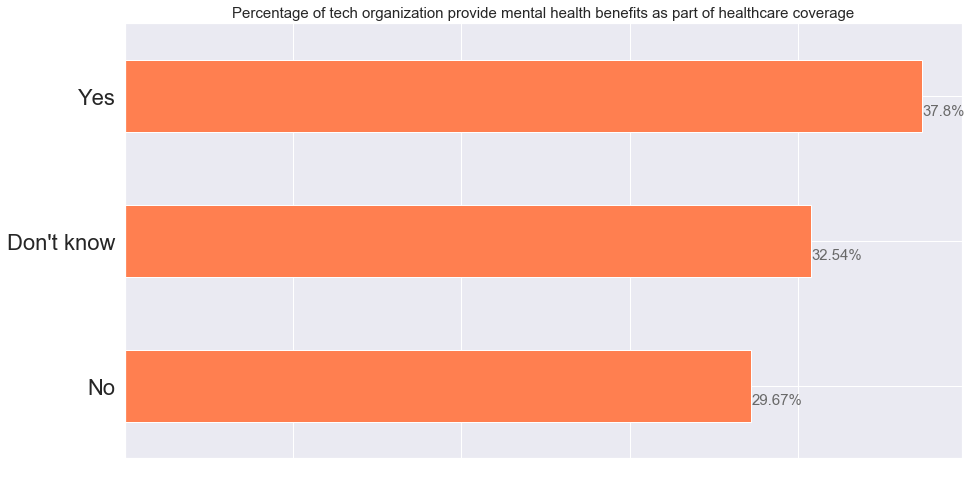

In [28]:
sns.set(font_scale=2)
ax=health_care_provide.value_counts().plot(kind='barh',figsize=(15,8),color="coral")
ax.set_alpha(0.8)
ax.set_title("Percentage of tech organization provide mental health benefits as part of healthcare coverage",fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

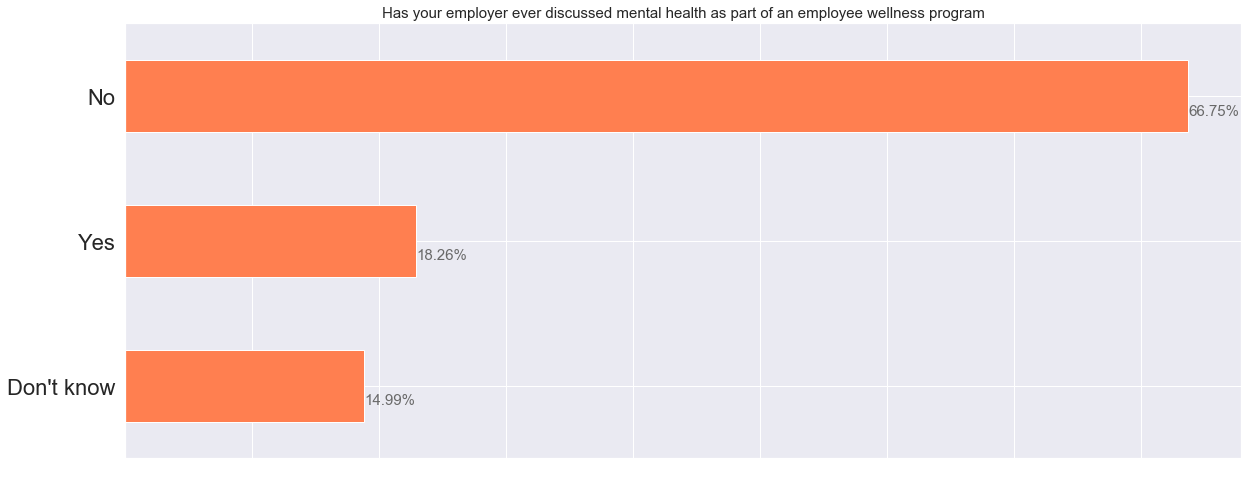

In [29]:
wellness_program=health_care_provide=asked_question['Has your employer ever discussed mental health as part of an employee wellness program?']
sns.set(font_scale=2)
ax=wellness_program.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title("Has your employer ever discussed mental health as part of an employee wellness program",fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [35]:
asked_question['What country do you live in?'].value_counts()

United States             747
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Bulgaria                    4
Singapore                   4
Finland                     3
Russia                      3
Mexico                      3
Austria                     3
Portugal                    2
Denmark                     2
Croatia                     2
Colombia                    2
Greece                      2
Czech Republic              1
Georgia                     1
Philippines                 1
Bahamas, The                1
Latvia    

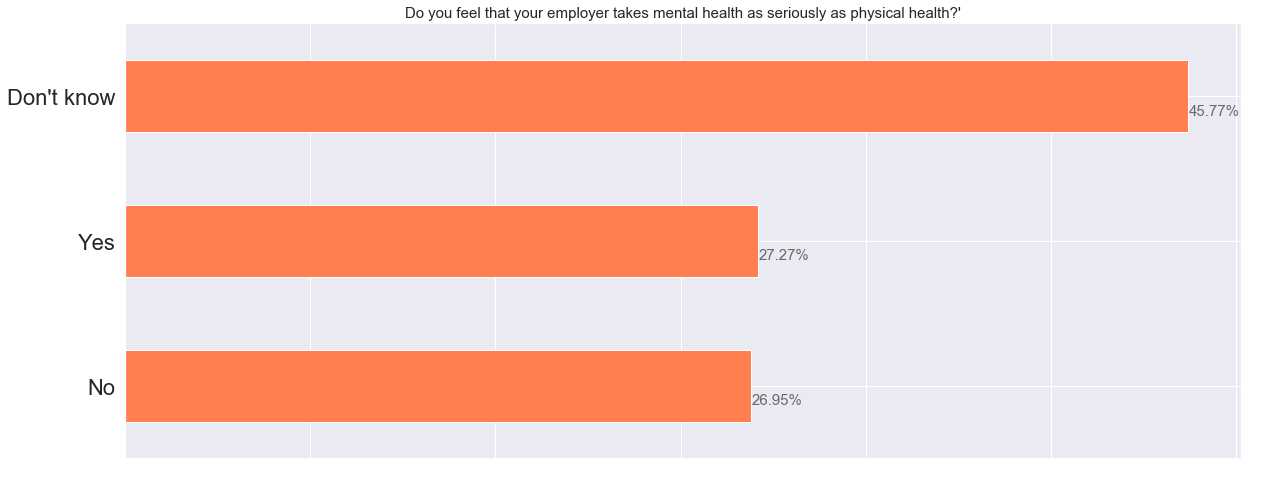

In [36]:
mental_health_seriousness=asked_question['Do you feel that your employer takes mental health as seriously as physical health?']
sns.set(font_scale=2)
ax=mental_health_seriousness.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title("Do you feel that your employer takes mental health as seriously as physical health?'",fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

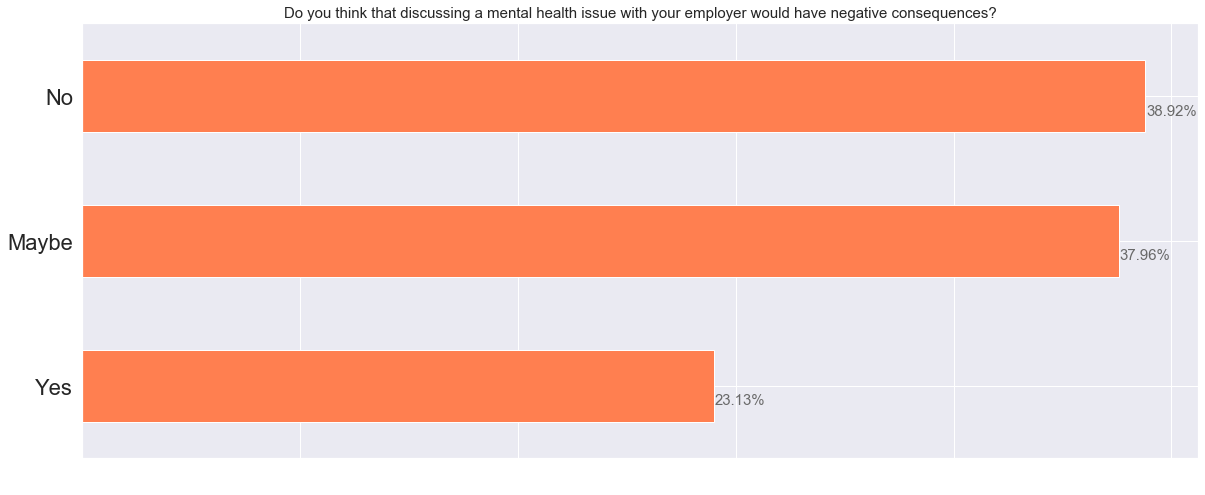

In [37]:
negative_effect=asked_question['Do you think that discussing a mental health issue with your employer would have negative consequences?']
sns.set(font_scale=2)
ax=negative_effect.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title('Do you think that discussing a mental health issue with your employer would have negative consequences?',fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

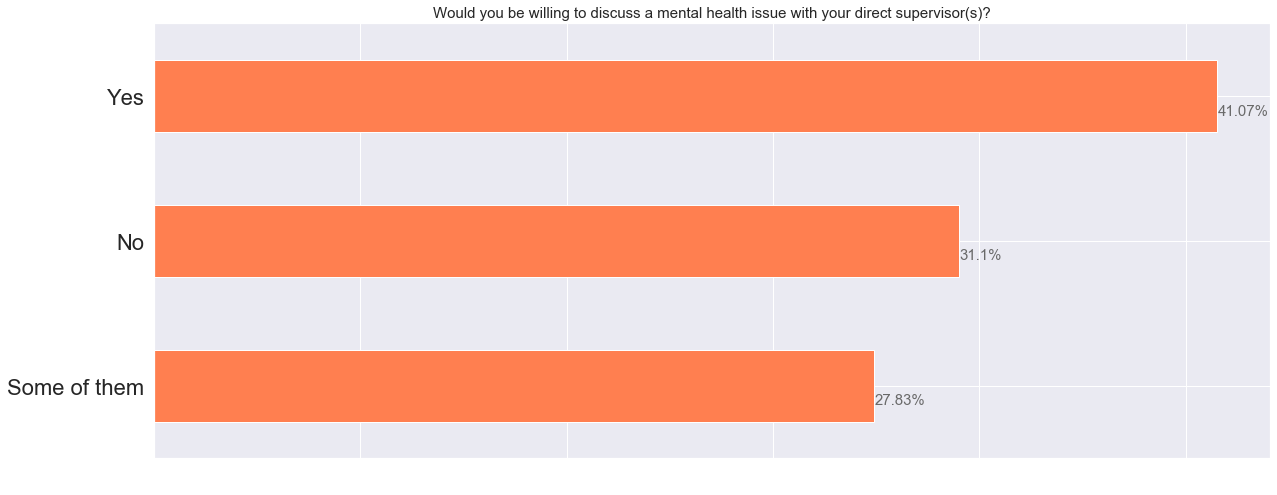

In [40]:
supervisor=asked_question['Would you be willing to discuss a mental health issue with your direct supervisor(s)?']
sns.set(font_scale=2)
ax=supervisor.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title('Would you be willing to discuss a mental health issue with your direct supervisor(s)?',fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

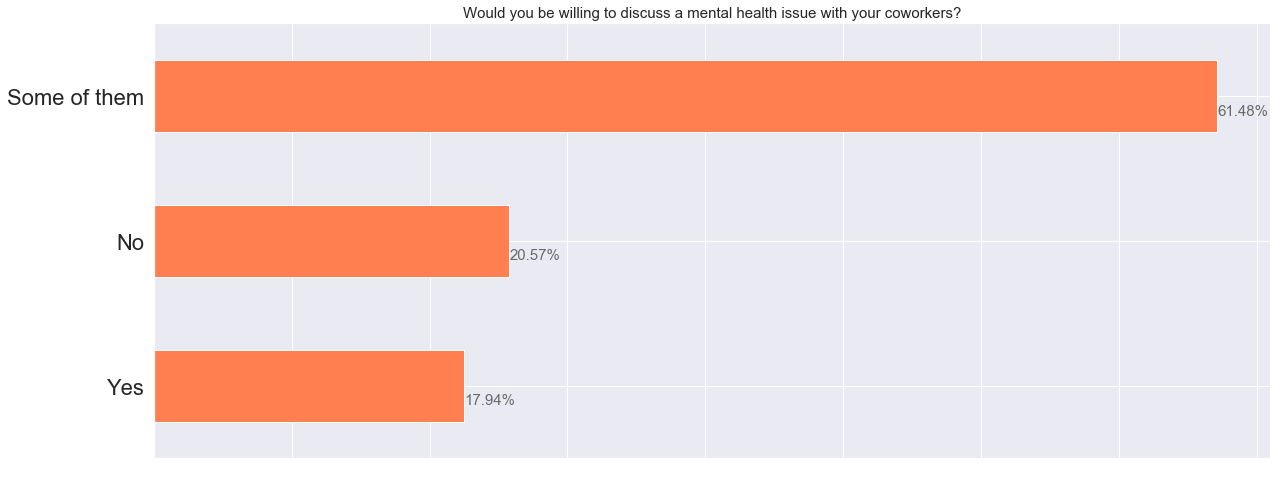

In [43]:
coworkers=asked_question['Would you be willing to discuss a mental health issue with your coworkers?']
sns.set(font_scale=2)
ax=coworkers.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title('Would you be willing to discuss a mental health issue with your coworkers?',fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

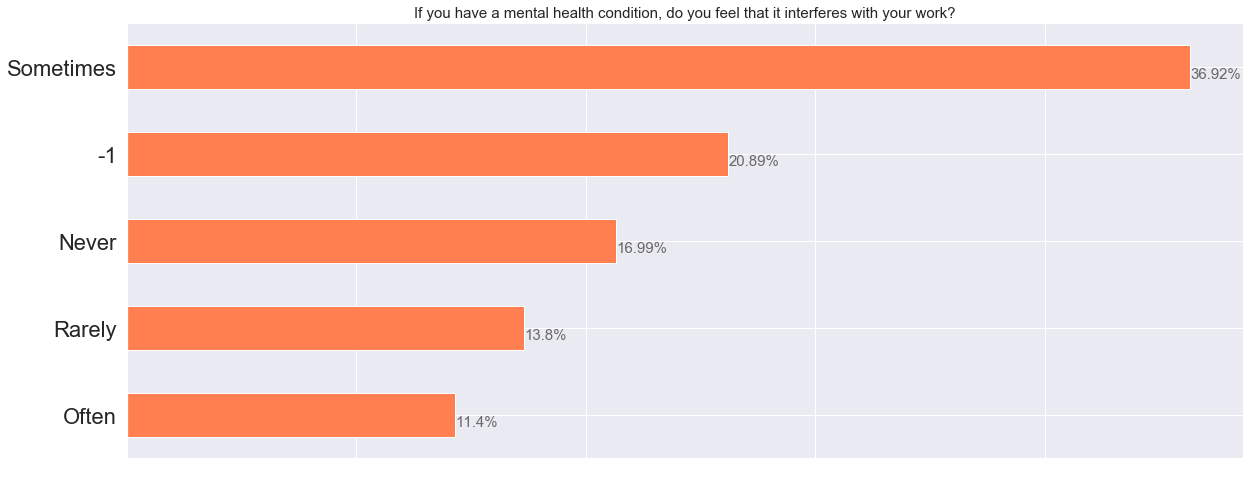

In [44]:
effect_of_mental=asked_question['If you have a mental health condition, do you feel that it interferes with your work?']
sns.set(font_scale=2)
ax=effect_of_mental.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title('If you have a mental health condition, do you feel that it interferes with your work?',fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

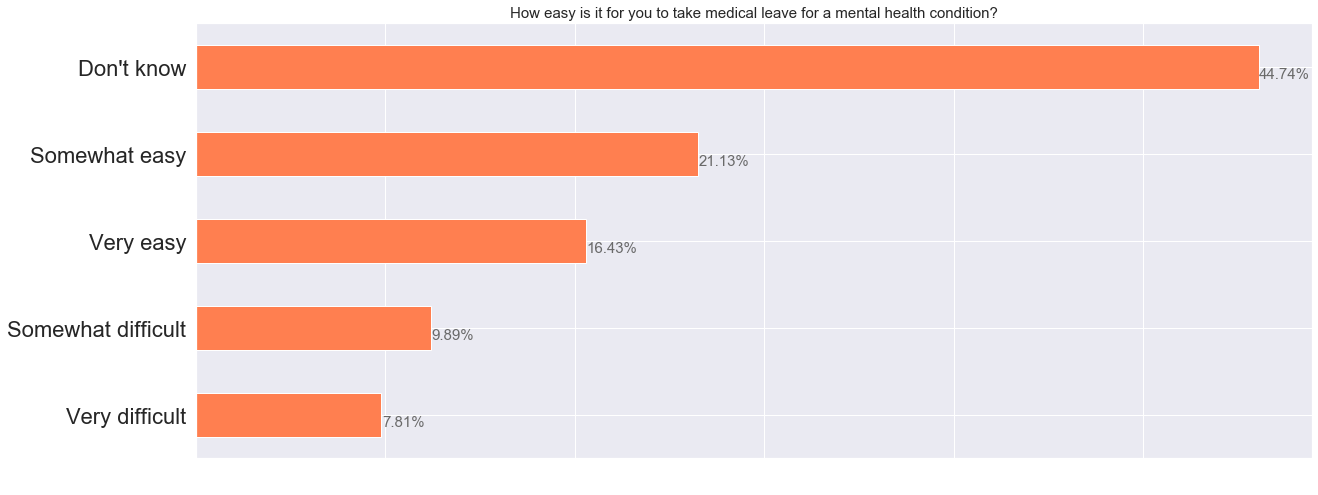

In [45]:
medical_leave=asked_question['How easy is it for you to take medical leave for a mental health condition?']
sns.set(font_scale=2)
ax=medical_leave.value_counts().plot(kind='barh',figsize=(20,8),color="coral")
ax.set_alpha(0.8)
ax.set_title('How easy is it for you to take medical leave for a mental health condition?',fontsize=15)
plt.xticks(c="w")

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()